In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("data_science_job.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
df.shape

(19158, 13)

In [8]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]

cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
18051,0.743,no_enrollment,High School,12.0,26.0
9874,0.920,no_enrollment,Graduate,20.0,7.0
1001,0.743,no_enrollment,Graduate,13.0,6.0
10103,0.624,Full time course,Primary School,4.0,25.0
10447,0.624,no_enrollment,Primary School,4.0,15.0


To check how much of the data will be left after dropping all particular rows

In [15]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [16]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

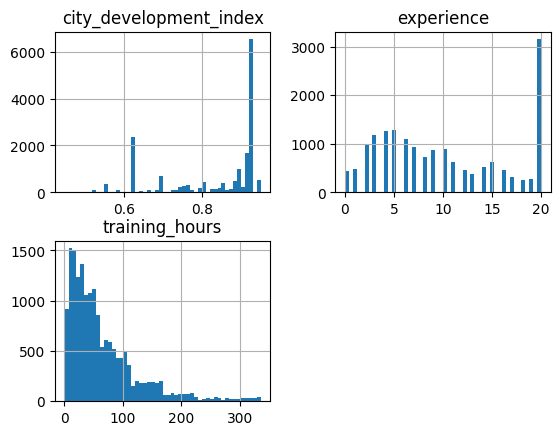

In [27]:
new_df.hist(bins=50)
plt.show()

Individual analysis of columns before and after CCA

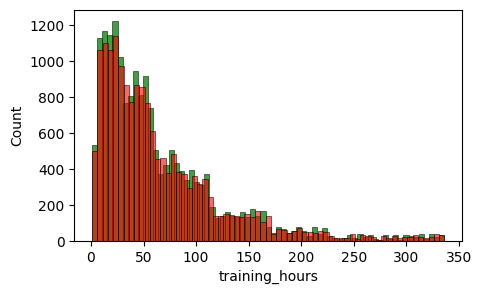

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 3))

sns.histplot(df["training_hours"], ax=ax1, color="green")

sns.histplot(new_df["training_hours"], ax=ax1, color="red", alpha=0.6)

plt.show()

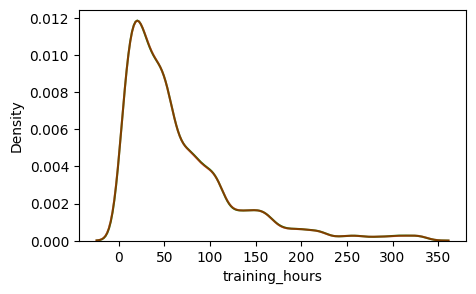

In [47]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 3))

sns.kdeplot(df["training_hours"], ax=ax1, color="green")

sns.kdeplot(new_df["training_hours"], ax=ax1, color="red", alpha=0.5)

plt.show()

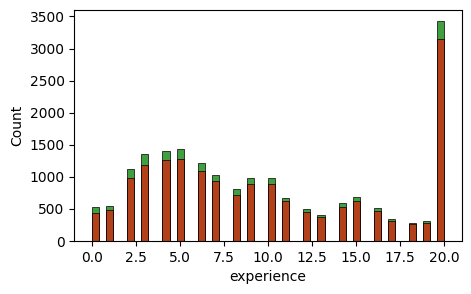

In [51]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 3))

sns.histplot(df["experience"], bins=50, ax=ax1, color="green")

sns.histplot(new_df["experience"], bins=50, ax=ax1, color="red", alpha=0.6)

plt.show()